In [1]:
import numpy as np                     ## Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import spacy
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import re
import string

## _Bussiness Problem_
_To present a shorter version of the original text while preserving the semantics. Here, you can use different traditional and advanced methods to implement automatic text summarization, and then compare the results of each method to conclude which is the best to use for your corpus._

In [2]:
Book = pd.read_csv("wings-of-fire.csv" )  ## Loading Dataset 
Book

,"ACHIEVERS I started my work at NASA at the Langley Research Centre (LRC) in Hampton, Virginia."
0,This is primarily an R&D centre for advanced a...
1,of LRC is of a piece of sculpture depicting a ...
2,research and the other technological developme...
3,interconnection between research and developme...
4,"Centre (GSFC) at Greenbelt, Maryland. This Cen..."
...,...
1386,"them to his own satisfaction. Judgement aside,..."
1387,"without pain. As for my afflicted friends, the..."
1388,may charge me with murder – Or want of sense (...
1389,approach to a false pretence Was never among m...


In [3]:
Book.columns = ['Observations']     ## Changing the column name
Book

,Observations
0,This is primarily an R&D centre for advanced a...
1,of LRC is of a piece of sculpture depicting a ...
2,research and the other technological developme...
3,interconnection between research and developme...
4,"Centre (GSFC) at Greenbelt, Maryland. This Cen..."
...,...
1386,"them to his own satisfaction. Judgement aside,..."
1387,"without pain. As for my afflicted friends, the..."
1388,may charge me with murder – Or want of sense (...
1389,approach to a false pretence Was never among m...


In [4]:
Book_Observations = ' '.join(Book)
Book_Observations

'Observations'

In [5]:
Book.shape

(1391, 1)

In [6]:
Book.head()

,Observations
0,This is primarily an R&D centre for advanced a...
1,of LRC is of a piece of sculpture depicting a ...
2,research and the other technological developme...
3,interconnection between research and developme...
4,"Centre (GSFC) at Greenbelt, Maryland. This Cen..."


In [7]:
Book.isnull().sum()  ## Checking if null value exist

Observations    0
dtype: int64

In [8]:
Book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1391 entries, 0 to 1390
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Observations  1391 non-null   object
dtypes: object(1)
memory usage: 11.0+ KB


In [9]:
Book.columns.values

array(['Observations'], dtype=object)

## _Text Preprocessing_

In [10]:
Book = [Observations.strip() for Observations in Book.Observations] ## Remove both the leading and the trailing characters
Book = [Observations for Observations in Book if Observations] ## Removes empty strings, because they are considered in Python as False
Book[0:10]

['This is primarily an R&D centre for advanced aerospace technology. One of my most vivid memories',
 'of LRC is of a piece of sculpture depicting a charioteer driving two horses, one representing scientific',
 'research and the other technological development, metaphorically encapsulating the',
 'interconnection between research and development. From LRC I went to the Goddard Space Flight',
 'Centre (GSFC) at Greenbelt, Maryland. This Centre develops and manages most of NASA’s earth-',
 'orbiting science and applications satellites. It operates NASA’s tracking networks for all space',
 'missions. Towards the end of my visit, Iwent to the Wallops Flight Facility at Wallops Island in East',
 'Coast, Virginia. This place was the base for NASA’s sounding rocket programme. Here, I saw a',
 'painting prominently displayed in the reception lobby. It depicted a battle scene with a few rockets',
 'flying in the background. A painting with this theme should be the most commonplace thing at a']

In [11]:
Book_observations = ' '.join(Book)    ## Joining the list into one string/text
Book_observations

'This is primarily an R&D centre for advanced aerospace technology. One of my most vivid memories of LRC is of a piece of sculpture depicting a charioteer driving two horses, one representing scientific research and the other technological development, metaphorically encapsulating the interconnection between research and development. From LRC I went to the Goddard Space Flight Centre (GSFC) at Greenbelt, Maryland. This Centre develops and manages most of NASA’s earth- orbiting science and applications satellites. It operates NASA’s tracking networks for all space missions. Towards the end of my visit, Iwent to the Wallops Flight Facility at Wallops Island in East Coast, Virginia. This place was the base for NASA’s sounding rocket programme. Here, I saw a painting prominently displayed in the reception lobby. It depicted a battle scene with a few rockets flying in the background. A painting with this theme should be the most commonplace thing at a Flight Facility, but the painting caugh

In [12]:
# Tokenization
from nltk.tokenize import TweetTokenizer    ## Remove Twitter username handles from a given twitter text.
tknzr = TweetTokenizer(strip_handles = True)
Book_observations = tknzr.tokenize(Book_observations)
print(Book_observations)

['This', 'is', 'primarily', 'an', 'R', '&', 'D', 'centre', 'for', 'advanced', 'aerospace', 'technology', '.', 'One', 'of', 'my', 'most', 'vivid', 'memories', 'of', 'LRC', 'is', 'of', 'a', 'piece', 'of', 'sculpture', 'depicting', 'a', 'charioteer', 'driving', 'two', 'horses', ',', 'one', 'representing', 'scientific', 'research', 'and', 'the', 'other', 'technological', 'development', ',', 'metaphorically', 'encapsulating', 'the', 'interconnection', 'between', 'research', 'and', 'development', '.', 'From', 'LRC', 'I', 'went', 'to', 'the', 'Goddard', 'Space', 'Flight', 'Centre', '(', 'GSFC', ')', 'at', 'Greenbelt', ',', 'Maryland', '.', 'This', 'Centre', 'develops', 'and', 'manages', 'most', 'of', 'NASA', '’', 's', 'earth', '-', 'orbiting', 'science', 'and', 'applications', 'satellites', '.', 'It', 'operates', 'NASA', '’', 's', 'tracking', 'networks', 'for', 'all', 'space', 'missions', '.', 'Towards', 'the', 'end', 'of', 'my', 'visit', ',', 'Iwent', 'to', 'the', 'Wallops', 'Flight', 'Facil

In [13]:
Book_observations_text=' '.join(Book_observations)  ## Again Joining the list into one string/text
Book_observations_text

'This is primarily an R & D centre for advanced aerospace technology . One of my most vivid memories of LRC is of a piece of sculpture depicting a charioteer driving two horses , one representing scientific research and the other technological development , metaphorically encapsulating the interconnection between research and development . From LRC I went to the Goddard Space Flight Centre ( GSFC ) at Greenbelt , Maryland . This Centre develops and manages most of NASA ’ s earth - orbiting science and applications satellites . It operates NASA ’ s tracking networks for all space missions . Towards the end of my visit , Iwent to the Wallops Flight Facility at Wallops Island in East Coast , Virginia . This place was the base for NASA ’ s sounding rocket programme . Here , I saw a painting prominently displayed in the reception lobby . It depicted a battle scene with a few rockets flying in the background . A painting with this theme should be the most commonplace thing at a Flight Facili

In [14]:
no_punc_text = Book_observations_text.translate(str.maketrans('','',string.punctuation))   ## Remove Punctuations 
no_punc_text

'This is primarily an R  D centre for advanced aerospace technology  One of my most vivid memories of LRC is of a piece of sculpture depicting a charioteer driving two horses  one representing scientific research and the other technological development  metaphorically encapsulating the interconnection between research and development  From LRC I went to the Goddard Space Flight Centre  GSFC  at Greenbelt  Maryland  This Centre develops and manages most of NASA ’ s earth  orbiting science and applications satellites  It operates NASA ’ s tracking networks for all space missions  Towards the end of my visit  Iwent to the Wallops Flight Facility at Wallops Island in East Coast  Virginia  This place was the base for NASA ’ s sounding rocket programme  Here  I saw a painting prominently displayed in the reception lobby  It depicted a battle scene with a few rockets flying in the background  A painting with this theme should be the most commonplace thing at a Flight Facility  but the paintin

In [15]:
no_url_text = re.sub(r'http\S+', '', no_punc_text)    ## Remove https or url within text
no_url_text

'This is primarily an R  D centre for advanced aerospace technology  One of my most vivid memories of LRC is of a piece of sculpture depicting a charioteer driving two horses  one representing scientific research and the other technological development  metaphorically encapsulating the interconnection between research and development  From LRC I went to the Goddard Space Flight Centre  GSFC  at Greenbelt  Maryland  This Centre develops and manages most of NASA ’ s earth  orbiting science and applications satellites  It operates NASA ’ s tracking networks for all space missions  Towards the end of my visit  Iwent to the Wallops Flight Facility at Wallops Island in East Coast  Virginia  This place was the base for NASA ’ s sounding rocket programme  Here  I saw a painting prominently displayed in the reception lobby  It depicted a battle scene with a few rockets flying in the background  A painting with this theme should be the most commonplace thing at a Flight Facility  but the paintin

In [16]:
## Tokenization

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NirajPalve\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NirajPalve\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
text_tokens=word_tokenize(no_url_text)
print(text_tokens)

['This', 'is', 'primarily', 'an', 'R', 'D', 'centre', 'for', 'advanced', 'aerospace', 'technology', 'One', 'of', 'my', 'most', 'vivid', 'memories', 'of', 'LRC', 'is', 'of', 'a', 'piece', 'of', 'sculpture', 'depicting', 'a', 'charioteer', 'driving', 'two', 'horses', 'one', 'representing', 'scientific', 'research', 'and', 'the', 'other', 'technological', 'development', 'metaphorically', 'encapsulating', 'the', 'interconnection', 'between', 'research', 'and', 'development', 'From', 'LRC', 'I', 'went', 'to', 'the', 'Goddard', 'Space', 'Flight', 'Centre', 'GSFC', 'at', 'Greenbelt', 'Maryland', 'This', 'Centre', 'develops', 'and', 'manages', 'most', 'of', 'NASA', '’', 's', 'earth', 'orbiting', 'science', 'and', 'applications', 'satellites', 'It', 'operates', 'NASA', '’', 's', 'tracking', 'networks', 'for', 'all', 'space', 'missions', 'Towards', 'the', 'end', 'of', 'my', 'visit', 'Iwent', 'to', 'the', 'Wallops', 'Flight', 'Facility', 'at', 'Wallops', 'Island', 'in', 'East', 'Coast', 'Virginia

In [18]:
## Tokens count
len(text_tokens)

23220

In [19]:
## Remove Stopwords

my_stop_words=stopwords.words('english')

sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['This', 'primarily', 'R', 'D', 'centre', 'advanced', 'aerospace', 'technology', 'One', 'vivid', 'memories', 'LRC', 'piece', 'sculpture', 'depicting', 'charioteer', 'driving', 'two', 'horses', 'one', 'representing', 'scientific', 'research', 'technological', 'development', 'metaphorically', 'encapsulating', 'interconnection', 'research', 'development', 'From', 'LRC', 'went', 'Goddard', 'Space', 'Flight', 'Centre', 'GSFC', 'Greenbelt', 'Maryland', 'This', 'Centre', 'develops', 'manages', 'NASA', '’', 'earth', 'orbiting', 'science', 'applications', 'satellites', 'It', 'operates', 'NASA', '’', 'tracking', 'networks', 'space', 'missions', 'Towards', 'end', 'visit', 'Iwent', 'Wallops', 'Flight', 'Facility', 'Wallops', 'Island', 'East', 'Coast', 'Virginia', 'This', 'place', 'base', 'NASA', '’', 'sounding', 'rocket', 'programme', 'Here', 'saw', 'painting', 'prominently', 'displayed', 'reception', 'lobby', 'It', 'depicted', 'battle', 'scene', 'rockets', 'flying', 'background', 'A', 'painting',

In [20]:
lower_words = [Text.lower() for Text in no_stop_tokens]   ## Normalize the data
print(lower_words[100:200])

['painting', 'caught', 'eye', 'soldiers', 'side', 'launching', 'rockets', 'white', 'darkskinned', 'racial', 'features', 'people', 'found', 'south', 'asia', 'one', 'day', 'curiosity', 'got', 'better', 'drawing', 'towards', 'painting', 'it', 'turned', 'tipu', 'sultan', '’', 'army', 'fighting', 'british', 'the', 'painting', 'depicted', 'fact', 'forgotten', 'tipu', '’', 'country', 'commemorated', 'side', 'planet', 'happy', 'see', 'indian', 'glorified', 'nasa', 'hero', 'warfare', 'rocketry', 'my', 'impression', 'american', 'people', 'summarized', 'quotation', 'benjamin', 'franklin', '“', 'those', 'things', 'hurt', 'instruct', '”', 'realised', 'people', 'part', 'world', 'meet', 'problems', 'head', 'they', 'attempt', 'get', 'rather', 'suffer', 'my', 'mother', 'narrated', 'incident', 'holy', 'book', '—', 'god', 'created', 'man', 'asked', 'angels', 'prostrate', 'adam', 'everybody', 'prostrated', 'except', 'iblis', 'satan', 'refused', '“', 'why', 'prostrate', '”']


In [21]:
from nltk.stem import PorterStemmer    ## Stemming (Optional)
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[100:200])

['paint', 'caught', 'eye', 'soldier', 'side', 'launch', 'rocket', 'white', 'darkskin', 'racial', 'featur', 'peopl', 'found', 'south', 'asia', 'one', 'day', 'curios', 'got', 'better', 'draw', 'toward', 'paint', 'it', 'turn', 'tipu', 'sultan', '’', 'armi', 'fight', 'british', 'the', 'paint', 'depict', 'fact', 'forgotten', 'tipu', '’', 'countri', 'commemor', 'side', 'planet', 'happi', 'see', 'indian', 'glorifi', 'nasa', 'hero', 'warfar', 'rocketri', 'my', 'impress', 'american', 'peopl', 'summar', 'quotat', 'benjamin', 'franklin', '“', 'those', 'thing', 'hurt', 'instruct', '”', 'realis', 'peopl', 'part', 'world', 'meet', 'problem', 'head', 'they', 'attempt', 'get', 'rather', 'suffer', 'my', 'mother', 'narrat', 'incid', 'holi', 'book', '—', 'god', 'creat', 'man', 'ask', 'angel', 'prostrat', 'adam', 'everybodi', 'prostrat', 'except', 'ibli', 'satan', 'refus', '“', 'whi', 'prostrat', '”']


In [22]:
nlp = spacy.load('en_core_web_sm')   ## Lemmatization
doc = nlp(' '.join(lower_words))
print(doc)

this primarily r d centre advanced aerospace technology one vivid memories lrc piece sculpture depicting charioteer driving two horses one representing scientific research technological development metaphorically encapsulating interconnection research development from lrc went goddard space flight centre gsfc greenbelt maryland this centre develops manages nasa ’ earth orbiting science applications satellites it operates nasa ’ tracking networks space missions towards end visit iwent wallops flight facility wallops island east coast virginia this place base nasa ’ sounding rocket programme here saw painting prominently displayed reception lobby it depicted battle scene rockets flying background a painting theme commonplace thing flight facility painting caught eye soldiers side launching rockets white darkskinned racial features people found south asia one day curiosity got better drawing towards painting it turned tipu sultan ’ army fighting british the painting depicted fact forgotte

In [23]:
lemmas = [token.lemma_ for token in doc]
print(lemmas)

['this', 'primarily', 'r', 'd', 'centre', 'advanced', 'aerospace', 'technology', 'one', 'vivid', 'memory', 'lrc', 'piece', 'sculpture', 'depict', 'charioteer', 'drive', 'two', 'horse', 'one', 'represent', 'scientific', 'research', 'technological', 'development', 'metaphorically', 'encapsulate', 'interconnection', 'research', 'development', 'from', 'lrc', 'go', 'goddard', 'space', 'flight', 'centre', 'gsfc', 'greenbelt', 'maryland', 'this', 'centre', 'develop', 'manage', 'nasa', "'", 'earth', 'orbit', 'science', 'application', 'satellite', 'it', 'operate', 'nasa', "'", 'track', 'network', 'space', 'mission', 'towards', 'end', 'visit', 'iwent', 'wallop', 'flight', 'facility', 'wallops', 'island', 'east', 'coast', 'virginia', 'this', 'place', 'base', 'nasa', "'", 'sound', 'rocket', 'programme', 'here', 'see', 'painting', 'prominently', 'display', 'reception', 'lobby', 'it', 'depict', 'battle', 'scene', 'rocket', 'fly', 'background', 'a', 'paint', 'theme', 'commonplace', 'thing', 'flight',

In [24]:
clean_Book = ' '.join(lemmas)
clean_Book

'this primarily r d centre advanced aerospace technology one vivid memory lrc piece sculpture depict charioteer drive two horse one represent scientific research technological development metaphorically encapsulate interconnection research development from lrc go goddard space flight centre gsfc greenbelt maryland this centre develop manage nasa \' earth orbit science application satellite it operate nasa \' track network space mission towards end visit iwent wallop flight facility wallops island east coast virginia this place base nasa \' sound rocket programme here see painting prominently display reception lobby it depict battle scene rocket fly background a paint theme commonplace thing flight facility painting catch eye soldier side launch rocket white darkskinne racial feature people find south asia one day curiosity got well draw towards paint it turn tipu sultan \' army fight british the painting depict fact forget tipu \' country commemorate side planet happy see indian glorif

## _Feature Extaction_
### _1. Countervectorizer_

In [25]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
Bookcv = cv.fit_transform(lemmas)

In [26]:
print(cv.vocabulary_)

{'this': 3233, 'primarily': 2499, 'centre': 554, 'advanced': 158, 'aerospace': 174, 'technology': 3188, 'one': 2237, 'vivid': 3470, 'memory': 2014, 'lrc': 1937, 'piece': 2396, 'sculpture': 2821, 'depict': 876, 'charioteer': 572, 'drive': 982, 'two': 3343, 'horse': 1548, 'represent': 2699, 'scientific': 2816, 'research': 2706, 'technological': 3187, 'development': 905, 'metaphorically': 2027, 'encapsulate': 1060, 'interconnection': 1715, 'from': 1347, 'go': 1411, 'goddard': 1415, 'space': 2996, 'flight': 1289, 'gsfc': 1448, 'greenbelt': 1437, 'maryland': 1985, 'develop': 904, 'manage': 1963, 'nasa': 2135, 'earth': 1004, 'orbit': 2266, 'science': 2814, 'application': 277, 'satellite': 2795, 'it': 1757, 'operate': 2248, 'track': 3292, 'network': 2157, 'mission': 2059, 'towards': 3289, 'end': 1068, 'visit': 3465, 'iwent': 1762, 'wallop': 3483, 'facility': 1217, 'wallops': 3484, 'island': 1752, 'east': 1007, 'coast': 619, 'virginia': 3461, 'place': 2403, 'base': 387, 'sound': 2989, 'rocket'

In [27]:
print(cv.get_feature_names()[100:200])

['abroad', 'absence', 'absorb', 'abul', 'abuse', 'academy', 'acceleration', 'accept', 'access', 'accessible', 'accident', 'accompany', 'accomplish', 'accomplished', 'accomplishment', 'accord', 'account', 'accountability', 'accounting', 'accustomed', 'acharya', 'ache', 'achieve', 'achievement', 'achiever', 'achyuta', 'acid', 'acknowledge', 'acquire', 'act', 'action', 'activate', 'active', 'activity', 'actualization', 'actually', 'acuman', 'adam', 'adapt', 'add', 'addition', 'additional', 'additive', 'address', 'ade', 'adequate', 'adhem', 'adhesive', 'administration', 'administrative', 'administrator', 'admiration', 'admire', 'admirer', 'admit', 'admonition', 'adopt', 'advance', 'advanced', 'advantage', 'adverse', 'advice', 'advise', 'adviser', 'advisor', 'advisory', 'advocate', 'ae', 'aerial', 'aerodynamic', 'aerodynamically', 'aeroelastic', 'aeronautical', 'aeronautics', 'aerospace', 'affair', 'affect', 'affection', 'affirm', 'afflict', 'afford', 'afresh', 'after', 'afternoon', 'afterw

d:\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [28]:
print(Bookcv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [29]:
print(Bookcv.toarray().shape)

(13443, 3592)


###  _2. CountVectorizer with N-grams (Bigrams & Trigrams)_

In [30]:
cv_ngram_range = CountVectorizer(analyzer = 'word', ngram_range = (1,3), max_features = 100)
bow_matrix_ngram = cv_ngram_range.fit_transform(lemmas) 

In [31]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['also', 'always', 'ask', 'become', 'brahm', 'bring', 'but', 'call', 'carry', 'centre', 'come', 'control', 'could', 'country', 'day', 'design', 'develop', 'development', 'dhawan', 'do', 'dr', 'effort', 'failure', 'feel', 'find', 'first', 'flight', 'get', 'give', 'go', 'great', 'he', 'in', 'indian', 'it', 'know', 'laboratory', 'launch', 'life', 'like', 'long', 'make', 'man', 'management', 'many', 'material', 'meet', 'member', 'missile', 'mission', 'my', 'need', 'never', 'new', 'next', 'one', 'payload', 'people', 'person', 'prakash', 'problem', 'prof', 'programme', 'project', 'propellant', 'rato', 'require', 'research', 'rocket', 'sarabhai', 'satellite', 'say', 'science', 'scientist', 'see', 'slv', 'space', 'stage', 'success', 'system', 'take', 'task', 'team', 'technology', 'test', 'the', 'this', 'time', 'two', 'use', 'vehicle', 'vssc', 'way', 'we', 'well', 'when', 'within', 'work', 'would', 'year']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 

### _3. TF-IDF Vectorizer_

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfv_ngram_max_features = TfidfVectorizer(norm = 'l2', analyzer = 'word', ngram_range = (1,3), max_features = 500)
tfidf_matix_ngram = tfidfv_ngram_max_features.fit_transform(lemmas)

In [33]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matix_ngram.toarray())

['ability', 'achieve', 'achievement', 'action', 'active', 'activity', 'after', 'air', 'aircraft', 'all', 'allah', 'almost', 'also', 'altitude', 'always', 'among', 'analysis', 'and', 'another', 'answer', 'anything', 'application', 'approach', 'area', 'around', 'as', 'ask', 'at', 'attempt', 'available', 'aware', 'away', 'babu', 'back', 'base', 'be', 'bear', 'become', 'begin', 'big', 'body', 'book', 'brahm', 'braun', 'bring', 'build', 'building', 'but', 'by', 'call', 'capability', 'carry', 'cause', 'caution', 'centre', 'challenge', 'change', 'charge', 'close', 'colleague', 'come', 'commitment', 'committee', 'communication', 'complete', 'complex', 'component', 'composite', 'condition', 'conduct', 'confidence', 'consider', 'control', 'could', 'country', 'create', 'critical', 'curien', 'day', 'death', 'decide', 'decision', 'deeply', 'defence', 'delhi', 'demand', 'design', 'detailed', 'determine', 'develop', 'development', 'dhawan', 'diameter', 'diamont', 'different', 'difficult', 'dimension'

## _Generate Word Cloud_

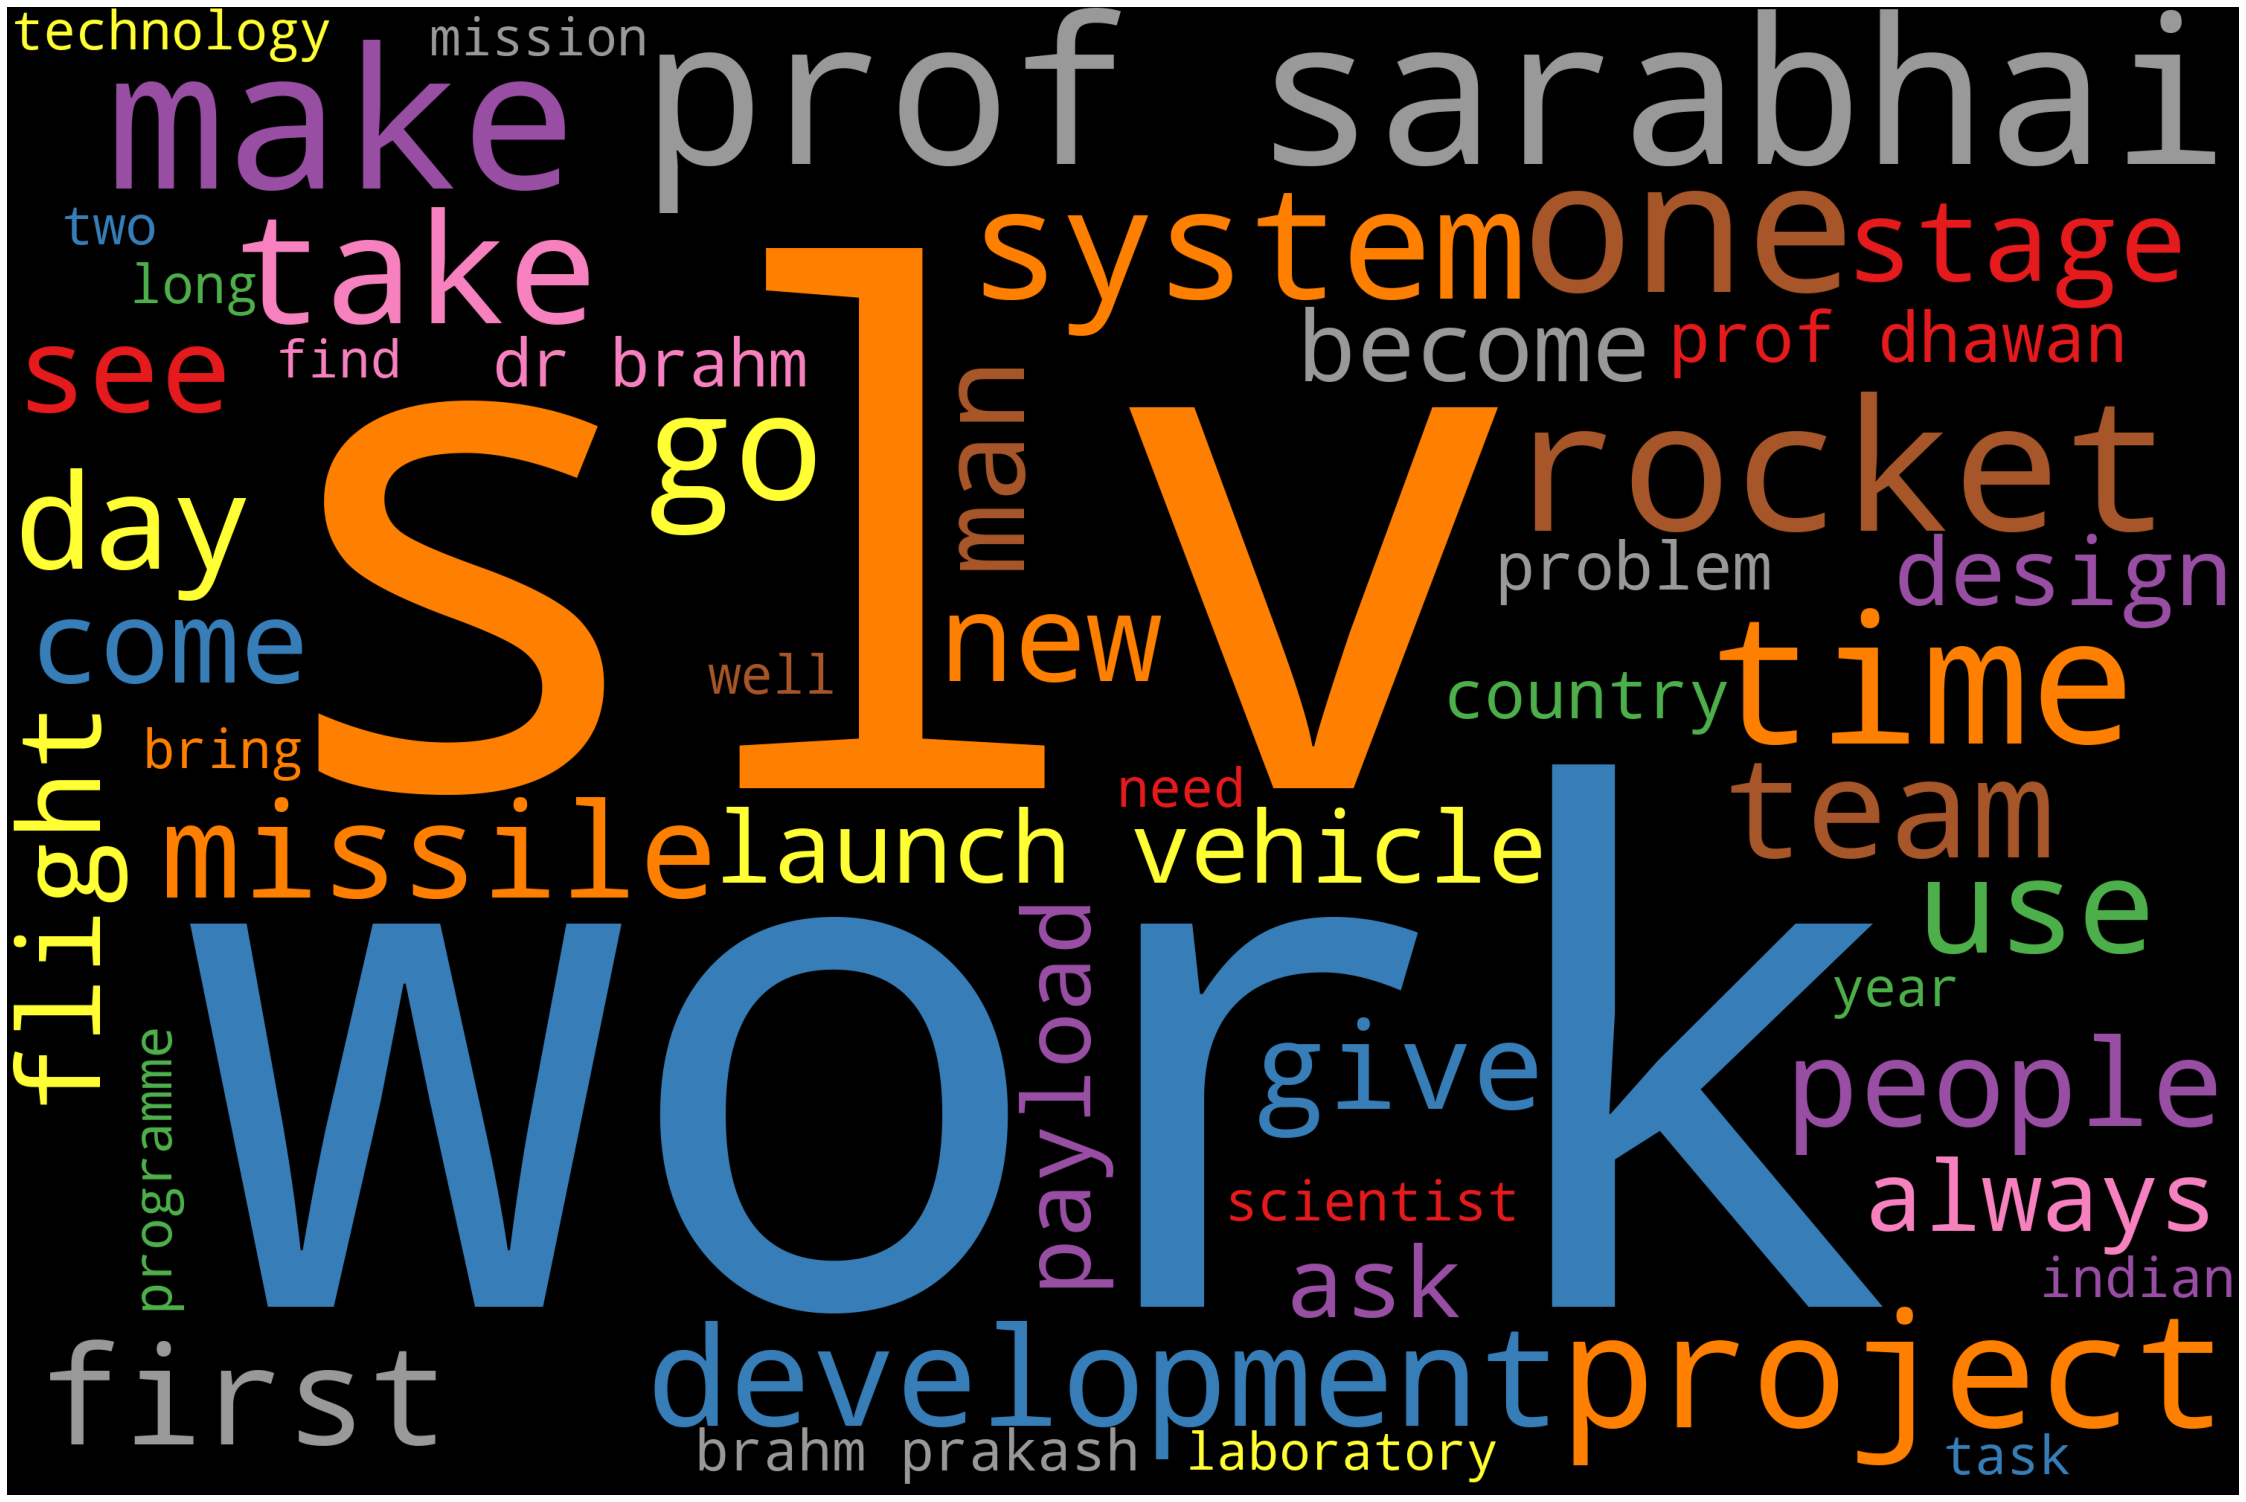

In [34]:
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):         ## Define a function to plot word cloud
    plt.figure(figsize = (40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    
# Generate Word Cloud

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud = WordCloud(width = 3000, height = 2000, background_color = 'black', max_words = 50,
                   colormap = 'Set1', stopwords = STOPWORDS).generate(clean_Book)
plot_cloud(wordcloud)

## _Named Entity Recognition (NER)_

In [35]:
nlp = spacy.load('en_core_web_sm')       ## Parts Of Speech (POS) Tagging

one_block = clean_Book
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style = 'ent', jupyter = True)

In [36]:
for token in doc_block[100:200]:
    print(token,token.pos_) 

painting NOUN
catch NOUN
eye NOUN
soldier NOUN
side NOUN
launch NOUN
rocket NOUN
white NOUN
darkskinne PROPN
racial ADJ
feature NOUN
people NOUN
find VERB
south PROPN
asia PROPN
one NUM
day NOUN
curiosity NOUN
got VERB
well ADV
draw VERB
towards ADP
paint NOUN
it PRON
turn VERB
tipu NOUN
sultan NOUN
' PART
army NOUN
fight NOUN
british ADJ
the DET
painting NOUN
depict NOUN
fact NOUN
forget VERB
tipu NOUN
' PUNCT
country NOUN
commemorate NOUN
side NOUN
planet NOUN
happy ADJ
see VERB
indian ADJ
glorify PROPN
nasa PROPN
hero NOUN
warfare NOUN
rocketry VERB
my PRON
impression NOUN
american ADJ
people NOUN
summarize VERB
quotation NOUN
benjamin PROPN
franklin PROPN
" PUNCT
those DET
thing NOUN
hurt VERB
instruct NOUN
" PUNCT
realise VERB
people NOUN
part NOUN
world NOUN
meet NOUN
problem NOUN
head NOUN
they PRON
attempt VERB
get AUX
rather ADV
suffer VERB
my PRON
mother NOUN
narrate PROPN
incident PROPN
holy PROPN
book PROPN
— PUNCT
god PROPN
create VERB
man NOUN
ask VERB
angel NOUN
prostrat

In [37]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['people', 'part', 'world', 'meet', 'problem', 'head', 'attempt', 'suffer', 'mother', 'create', 'man', 'ask', 'angel', 'prostrate', 'refuse', 'prostrate', 'ask', 'create', 'fire', 'clay', 'make', 'nobler', 'contend', 'say', 'go', 'place', 'pride', 'curse', 'fate', 'follow', 'suit', 'become', 'transgressor', 'eat', 'fruit', 'say', 'go', 'descendant', 'life', 'doubt', 'mistrust', 'make', 'life', 'organization', 'prevalence', 'pride', 'stop', 'listen', 'people', 'line', 'expect', 'person', 'deliver', 'result', 'humiliate', 'expect', 'abuse', 'despise', 'line', 'firmness', 'harshness', 'leadership', 'bully', 'discipline', 'vindictiveness', 'draw', 'line', 'draw', 'country', 'today', 'hero', 'side', 'hero', 'keep', 'people', 'side', 'situation', 'change', 'process', 'confront', 'solving', 'problem', 'require', 'work', 'procrastination', 'problem', 'cut', 'edge', 'distinguish', 'success', 'failure', 'draw', 'courage', 'wisdom', 'return', 'rocket', 'launch', 'take', 'place', 'sound']


In [38]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis = 0)

words_freq = [(word,sum_words[0,idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['word','count']
wd_df[0:10] 

,word,count
0,work,104
1,slv,100
2,rocket,93
3,project,74
4,make,72
5,launch,69
6,system,61
7,time,59
8,take,58
9,team,58


<AxesSubplot:title={'center':'Top 10 nouns and verbs'}, xlabel='word'>

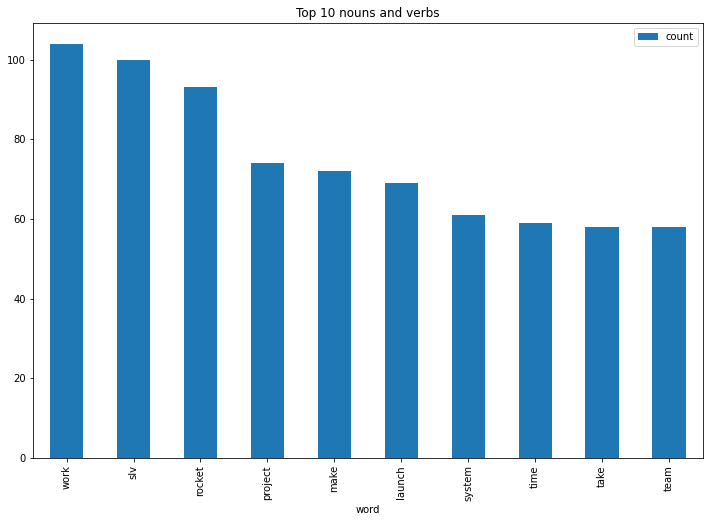

In [39]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x = 'word', figsize = (12,8), title = 'Top 10 nouns and verbs')

## _Summarization using spacy (Auto Trained Model)_

In [40]:
import spacy
import en_core_web_sm
 
nlp = en_core_web_sm.load()

 
# Convert text into spacy formatted document
doc = nlp(Book_observations_text)
 
clean_token = []
for token in doc:
    if not (token.is_stop):
        clean_token.append(token.text)
         
print('Before:-------')
print(doc,'\n')

Before:-------
This is primarily an R & D centre for advanced aerospace technology . One of my most vivid memories of LRC is of a piece of sculpture depicting a charioteer driving two horses , one representing scientific research and the other technological development , metaphorically encapsulating the interconnection between research and development . From LRC I went to the Goddard Space Flight Centre ( GSFC ) at Greenbelt , Maryland . This Centre develops and manages most of NASA ’ s earth - orbiting science and applications satellites . It operates NASA ’ s tracking networks for all space missions . Towards the end of my visit , Iwent to the Wallops Flight Facility at Wallops Island in East Coast , Virginia . This place was the base for NASA ’ s sounding rocket programme . Here , I saw a painting prominently displayed in the reception lobby . It depicted a battle scene with a few rockets flying in the background . A painting with this theme should be the most commonplace thing at a

In [41]:
# Join sentence without stop words and print
print('After:-------')
' '.join(clean_token)

After:-------


'primarily R & D centre advanced aerospace technology . vivid memories LRC piece sculpture depicting charioteer driving horses , representing scientific research technological development , metaphorically encapsulating interconnection research development . LRC went Goddard Space Flight Centre ( GSFC ) Greenbelt , Maryland . Centre develops manages NASA ’ s earth - orbiting science applications satellites . operates NASA ’ s tracking networks space missions . end visit , Iwent Wallops Flight Facility Wallops Island East Coast , Virginia . place base NASA ’ s sounding rocket programme . , saw painting prominently displayed reception lobby . depicted battle scene rockets flying background . painting theme commonplace thing Flight Facility , painting caught eye soldiers launching rockets white , dark - skinned , racial features people found South Asia . day , curiosity got better , drawing painting . turned Tipu Sultan ’ s army fighting British . painting depicted fact forgotten Tipu ’ s 

In [42]:
Book_1 = ' '.join(clean_token)
Book_1

'primarily R & D centre advanced aerospace technology . vivid memories LRC piece sculpture depicting charioteer driving horses , representing scientific research technological development , metaphorically encapsulating interconnection research development . LRC went Goddard Space Flight Centre ( GSFC ) Greenbelt , Maryland . Centre develops manages NASA ’ s earth - orbiting science applications satellites . operates NASA ’ s tracking networks space missions . end visit , Iwent Wallops Flight Facility Wallops Island East Coast , Virginia . place base NASA ’ s sounding rocket programme . , saw painting prominently displayed reception lobby . depicted battle scene rockets flying background . painting theme commonplace thing Flight Facility , painting caught eye soldiers launching rockets white , dark - skinned , racial features people found South Asia . day , curiosity got better , drawing painting . turned Tipu Sultan ’ s army fighting British . painting depicted fact forgotten Tipu ’ s 

In [43]:
len(Book_1)

91564

# _Model Building_

### 1) _LexRank Model_

In [44]:
import sumy                                ## Importing libraries
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lex_rank import LexRankSummarizer

In [45]:
## Fit our data to the model to summarized
parser = PlaintextParser.from_string(Book_1,Tokenizer('english'))

In [46]:
parser

In [47]:
from sumy.summarizers.lex_rank import LexRankSummarizer   ## Import Model

In [48]:
summarizer = LexRankSummarizer()

In [49]:
summary = summarizer(parser.document,70)

In [50]:
for sentence in summary:
     print(sentence)

” realised people world meet problems head .
mother narrated incident Holy Book — God created man , asked angels prostrate Adam .
People work virtually round clock enthusiasm Prof . Sarabhai new , country — new design new method fabrication - - - way administrative procedure .
view , wide - ranging programme scientific technological development rocket fuels , propulsion systems , aeronautics , aerospace materials , advanced fabrication techniques , rocket motor instrumentation , control guidance systems , telemetry , tracking systems scientific instruments experimentation space launched Space Science Technology Centre Physical Research Laboratory Ahmedabad .
distinguishes sounding rocket Satellite Launch Vehicle ( SLV ) missile ?
fact , different kinds rockets .
development rockets resulted fully indigenous capability production sounding rockets propellants .
” fact , Prof . Sarabhai took series decisions life - mission .
Working nose cones led , natural consequence , field composite m

In [51]:
final_summary = " ".join(map(str, summary[0:]))    ## Join the scentences to make a continous summar
final_summary

'” realised people world meet problems head . mother narrated incident Holy Book — God created man , asked angels prostrate Adam . People work virtually round clock enthusiasm Prof . Sarabhai new , country — new design new method fabrication - - - way administrative procedure . view , wide - ranging programme scientific technological development rocket fuels , propulsion systems , aeronautics , aerospace materials , advanced fabrication techniques , rocket motor instrumentation , control guidance systems , telemetry , tracking systems scientific instruments experimentation space launched Space Science Technology Centre Physical Research Laboratory Ahmedabad . distinguishes sounding rocket Satellite Launch Vehicle ( SLV ) missile ? fact , different kinds rockets . development rockets resulted fully indigenous capability production sounding rockets propellants . ” fact , Prof . Sarabhai took series decisions life - mission . Working nose cones led , natural consequence , field composite 

In [52]:
## Remove punctuations mark from the summary
translate_table = dict((ord(char), None) for char in string.punctuation)   ## Summary From LexRank Model 
final_summary_1 = final_summary.translate(translate_table)
final_summary_1

'” realised people world meet problems head  mother narrated incident Holy Book — God created man  asked angels prostrate Adam  People work virtually round clock enthusiasm Prof  Sarabhai new  country — new design new method fabrication    way administrative procedure  view  wide  ranging programme scientific technological development rocket fuels  propulsion systems  aeronautics  aerospace materials  advanced fabrication techniques  rocket motor instrumentation  control guidance systems  telemetry  tracking systems scientific instruments experimentation space launched Space Science Technology Centre Physical Research Laboratory Ahmedabad  distinguishes sounding rocket Satellite Launch Vehicle  SLV  missile  fact  different kinds rockets  development rockets resulted fully indigenous capability production sounding rockets propellants  ” fact  Prof  Sarabhai took series decisions life  mission  Working nose cones led  natural consequence  field composite materials  fact team members ’ p

In [53]:
len(final_summary_1),len(Book_1)

(4468, 91564)

In [54]:
from rouge import Rouge         ## Model Evaluation
rouge = Rouge()

In [55]:
rouge.get_scores(final_summary_1, Book_1)

[{'rouge-1': {'r': 0.08445164275798242,
   'p': 0.9972677595628415,
   'f': 0.15571672210995838},
  'rouge-2': {'r': 0.03790138620810669,
   'p': 0.7728085867620751,
   'f': 0.07225892693340091},
  'rouge-l': {'r': 0.08445164275798242,
   'p': 0.9972677595628415,
   'f': 0.15571672210995838}}]

### 2) _Luhn Summarizer_

In [56]:
from sumy.summarizers.luhn import LuhnSummarizer     ## Importing Library
luhn_summarizer = LuhnSummarizer()

In [57]:
summary_1 = luhn_summarizer(parser.document,20)  ## Model Building

In [58]:
for sentence in summary_1:
    print(sentence)

Right day INCOSPAR formed , aware need organize integrated national space programme , equipment manufacture rockets launch facilities developed produced indigenously .
view , wide - ranging programme scientific technological development rocket fuels , propulsion systems , aeronautics , aerospace materials , advanced fabrication techniques , rocket motor instrumentation , control guidance systems , telemetry , tracking systems scientific instruments experimentation space launched Space Science Technology Centre Physical Research Laboratory Ahmedabad .
X - ray payloads look stars ; payloads fitted radio frequency mass spectrometers analyse gas composition upper atmosphere ; sodium payloads find wind conditions , direction velocity .
evening , news India taking indigenous development device help short run - offs high performance military aircraft , heading project , public .
plan talked realisation SLV injecting lightweight satellites low earth orbit , upgrading Indian satellites laborato

In [59]:
final_summary2 = " ".join(map(str, summary_1[0:]))  ## Joining the sentences
final_summary2

'Right day INCOSPAR formed , aware need organize integrated national space programme , equipment manufacture rockets launch facilities developed produced indigenously . view , wide - ranging programme scientific technological development rocket fuels , propulsion systems , aeronautics , aerospace materials , advanced fabrication techniques , rocket motor instrumentation , control guidance systems , telemetry , tracking systems scientific instruments experimentation space launched Space Science Technology Centre Physical Research Laboratory Ahmedabad . X - ray payloads look stars ; payloads fitted radio frequency mass spectrometers analyse gas composition upper atmosphere ; sodium payloads find wind conditions , direction velocity . evening , news India taking indigenous development device help short run - offs high performance military aircraft , heading project , public . plan talked realisation SLV injecting lightweight satellites low earth orbit , upgrading Indian satellites laborat

In [60]:
## Remove punctuations mark from the summary
translate_table = dict((ord(char), None) for char in string.punctuation)   ## Summary From Luhn Summarizer
final_summary_2 = final_summary2.translate(translate_table)
final_summary_2

'Right day INCOSPAR formed  aware need organize integrated national space programme  equipment manufacture rockets launch facilities developed produced indigenously  view  wide  ranging programme scientific technological development rocket fuels  propulsion systems  aeronautics  aerospace materials  advanced fabrication techniques  rocket motor instrumentation  control guidance systems  telemetry  tracking systems scientific instruments experimentation space launched Space Science Technology Centre Physical Research Laboratory Ahmedabad  X  ray payloads look stars  payloads fitted radio frequency mass spectrometers analyse gas composition upper atmosphere  sodium payloads find wind conditions  direction velocity  evening  news India taking indigenous development device help short run  offs high performance military aircraft  heading project  public  plan talked realisation SLV injecting lightweight satellites low earth orbit  upgrading Indian satellites laboratory models space entities

In [61]:
len(final_summary_2),len(Book_1)

(4406, 91564)

In [62]:
rouge.get_scores(final_summary_2, Book_1)   ## Model Evaluation

[{'rouge-1': {'r': 0.0934752429430819, 'p': 1.0, 'f': 0.17096910550374847},
  'rouge-2': {'r': 0.036848569924548165, 'p': 0.8, 'f': 0.07045206659081957},
  'rouge-l': {'r': 0.0934752429430819, 'p': 1.0, 'f': 0.17096910550374847}}]

### 3) _LSA Summarizer_

In [63]:
from sumy.summarizers.lsa import LsaSummarizer   ## Importing Library
lsa_summarizer = LsaSummarizer()

In [64]:
lsa_summary = lsa_summarizer(parser.document,25)    ## Model Building

In [65]:
for sentence in lsa_summary:
    print(sentence)

precisely situation INCOSPAR 1963 . bunch young , inexperienced , energetic enthusiastic persons given task fleshing spirit selfreliance field science technology general , space research particular .
Right day INCOSPAR formed , aware need organize integrated national space programme , equipment manufacture rockets launch facilities developed produced indigenously .
exceptions like Prof . Oda Sudhakar , bring work personal touch magic based individual character , personality , inner motives , dreams crystallized hearts .
found going head attempting task capability skill , Prof . Sarabhai reassign activity way lower pressure permit better quality work performed .
evening , news India taking indigenous development device help short run - offs high performance military aircraft , heading project , public .
Iwas filled emotions — happiness , gratitude , sense fulfilment lines littleknown poet nineteenth - century crossed mind : days prepare meet alike anvil , bear – hammer , strike .
plan m

In [66]:
final_summary3 = " ".join(map(str, lsa_summary[0:]))

In [67]:
final_summary3

'precisely situation INCOSPAR 1963 . bunch young , inexperienced , energetic enthusiastic persons given task fleshing spirit selfreliance field science technology general , space research particular . Right day INCOSPAR formed , aware need organize integrated national space programme , equipment manufacture rockets launch facilities developed produced indigenously . exceptions like Prof . Oda Sudhakar , bring work personal touch magic based individual character , personality , inner motives , dreams crystallized hearts . found going head attempting task capability skill , Prof . Sarabhai reassign activity way lower pressure permit better quality work performed . evening , news India taking indigenous development device help short run - offs high performance military aircraft , heading project , public . Iwas filled emotions — happiness , gratitude , sense fulfilment lines littleknown poet nineteenth - century crossed mind : days prepare meet alike anvil , bear – hammer , strike . plan 

In [68]:
## Remove punctuations mark from the summary
import string
translate_table = dict((ord(char), None) for char in string.punctuation)   ## Summary From LSA Summarizer
final_summary_3 = final_summary3.translate(translate_table)
final_summary_3

'precisely situation INCOSPAR 1963  bunch young  inexperienced  energetic enthusiastic persons given task fleshing spirit selfreliance field science technology general  space research particular  Right day INCOSPAR formed  aware need organize integrated national space programme  equipment manufacture rockets launch facilities developed produced indigenously  exceptions like Prof  Oda Sudhakar  bring work personal touch magic based individual character  personality  inner motives  dreams crystallized hearts  found going head attempting task capability skill  Prof  Sarabhai reassign activity way lower pressure permit better quality work performed  evening  news India taking indigenous development device help short run  offs high performance military aircraft  heading project  public  Iwas filled emotions — happiness  gratitude  sense fulfilment lines littleknown poet nineteenth  century crossed mind  days prepare meet alike anvil  bear – hammer  strike  plan mainly centred early ideas bo

In [69]:
rouge.get_scores(final_summary_3, Book_1)   ## Model Evaluation

[{'rouge-1': {'r': 0.09925960203609441,
   'p': 0.9976744186046511,
   'f': 0.1805555539095536},
  'rouge-2': {'r': 0.03623442709247236,
   'p': 0.8082191780821918,
   'f': 0.06935930726496996},
  'rouge-l': {'r': 0.09925960203609441,
   'p': 0.9976744186046511,
   'f': 0.1805555539095536}}]

### 4) _LSA with Stopwords_

In [70]:
from sumy.utils import get_stop_words    ## Importing Library
summarizer_lsa2 = LsaSummarizer()
summarizer_lsa2.stop_words = get_stop_words('english')

In [71]:
summary2 = summarizer_lsa2(parser.document,20)   ## Model Building

In [72]:
for sentence in summary2:
    print(sentence)

precisely situation INCOSPAR 1963 . bunch young , inexperienced , energetic enthusiastic persons given task fleshing spirit selfreliance field science technology general , space research particular .
Iwas filled emotions — happiness , gratitude , sense fulfilment lines littleknown poet nineteenth - century crossed mind : days prepare meet alike anvil , bear – hammer , strike .
plan mainly centred early ideas born INCOSPAR ; included utilization satellites television developmental education , meteorological observations remote sensing management natural resources .
Recognising immense socio - economic benefits space technology , Prof . Sarabhai decided 1969 , - steam ahead task establishing indigenous capability building launching satellites .
talked rocket launching station , envisaging facilities like launch pads , block houses , radar , telemetry — things taken granted Indian space research today .
Dr Brahm Prakash formed Project Advisory Committees advise specialized areas like rock

In [73]:
final_summary5 = " ".join(map(str, summary2[0:]))
final_summary5

'precisely situation INCOSPAR 1963 . bunch young , inexperienced , energetic enthusiastic persons given task fleshing spirit selfreliance field science technology general , space research particular . Iwas filled emotions — happiness , gratitude , sense fulfilment lines littleknown poet nineteenth - century crossed mind : days prepare meet alike anvil , bear – hammer , strike . plan mainly centred early ideas born INCOSPAR ; included utilization satellites television developmental education , meteorological observations remote sensing management natural resources . Recognising immense socio - economic benefits space technology , Prof . Sarabhai decided 1969 , - steam ahead task establishing indigenous capability building launching satellites . talked rocket launching station , envisaging facilities like launch pads , block houses , radar , telemetry — things taken granted Indian space research today . Dr Brahm Prakash formed Project Advisory Committees advise specialized areas like roc

In [74]:
## Remove punctuations mark from the summary
import string
translate_table = dict((ord(char), None) for char in string.punctuation)   ## Summary From LSA Summarizer (with stopwords)
final_summary_5 = final_summary5.translate(translate_table)
final_summary_5

'precisely situation INCOSPAR 1963  bunch young  inexperienced  energetic enthusiastic persons given task fleshing spirit selfreliance field science technology general  space research particular  Iwas filled emotions — happiness  gratitude  sense fulfilment lines littleknown poet nineteenth  century crossed mind  days prepare meet alike anvil  bear – hammer  strike  plan mainly centred early ideas born INCOSPAR  included utilization satellites television developmental education  meteorological observations remote sensing management natural resources  Recognising immense socio  economic benefits space technology  Prof  Sarabhai decided 1969   steam ahead task establishing indigenous capability building launching satellites  talked rocket launching station  envisaging facilities like launch pads  block houses  radar  telemetry — things taken granted Indian space research today  Dr Brahm Prakash formed Project Advisory Committees advise specialized areas like rocket motors  materials fabr

In [75]:
rouge.get_scores(final_summary_5, Book_1)   ## Model Evaluation

[{'rouge-1': {'r': 0.08514576584914392, 'p': 1.0, 'f': 0.15692963608049065},
  'rouge-2': {'r': 0.029742060010528162,
   'p': 0.7920560747663551,
   'f': 0.05733130320901394},
  'rouge-l': {'r': 0.08514576584914392, 'p': 1.0, 'f': 0.15692963608049065}}]

### 5) _Text Rank_

In [76]:
from sumy.summarizers.text_rank import TextRankSummarizer   ## Importing Library
text_summary = TextRankSummarizer()

In [77]:
summary_result = text_summary(parser.document,20)    ## Model Building

In [78]:
for sentence in summary_result:
    print(sentence)

People work virtually round clock enthusiasm Prof . Sarabhai new , country — new design new method fabrication - - - way administrative procedure .
Prof . Sarabhai talking Satellite Launch Vehicle ( SLV ) , asked , breath , studies rocketassisted - system ( RATO ) military aircraft .
view , wide - ranging programme scientific technological development rocket fuels , propulsion systems , aeronautics , aerospace materials , advanced fabrication techniques , rocket motor instrumentation , control guidance systems , telemetry , tracking systems scientific instruments experimentation space launched Space Science Technology Centre Physical Research Laboratory Ahmedabad .
time , Prof . Sarabhai hand - picked team form dream Indian SLV .
arrived better awareness Stage IV problems supportive counselling Prof . Curien , Prof . Sarabhai ’ s catalytic intervention led Prof . Curien reinterpret progress Diamont programme .
Suddenly , senior scientist worked closely Prof . Sarabhai turned enquired ,

In [79]:
textrank_final = " ".join(map(str, summary_result[0:]))
textrank_final

'People work virtually round clock enthusiasm Prof . Sarabhai new , country — new design new method fabrication - - - way administrative procedure . Prof . Sarabhai talking Satellite Launch Vehicle ( SLV ) , asked , breath , studies rocketassisted - system ( RATO ) military aircraft . view , wide - ranging programme scientific technological development rocket fuels , propulsion systems , aeronautics , aerospace materials , advanced fabrication techniques , rocket motor instrumentation , control guidance systems , telemetry , tracking systems scientific instruments experimentation space launched Space Science Technology Centre Physical Research Laboratory Ahmedabad . time , Prof . Sarabhai hand - picked team form dream Indian SLV . arrived better awareness Stage IV problems supportive counselling Prof . Curien , Prof . Sarabhai ’ s catalytic intervention led Prof . Curien reinterpret progress Diamont programme . Suddenly , senior scientist worked closely Prof . Sarabhai turned enquired 

In [80]:
## Removing punctuations marks from summary
import string
translate_table = dict((ord(char), None) for char in string.punctuation)   ## Summary from TextRank 
TextRank_Summary = textrank_final.translate(translate_table)
TextRank_Summary

'People work virtually round clock enthusiasm Prof  Sarabhai new  country — new design new method fabrication    way administrative procedure  Prof  Sarabhai talking Satellite Launch Vehicle  SLV   asked  breath  studies rocketassisted  system  RATO  military aircraft  view  wide  ranging programme scientific technological development rocket fuels  propulsion systems  aeronautics  aerospace materials  advanced fabrication techniques  rocket motor instrumentation  control guidance systems  telemetry  tracking systems scientific instruments experimentation space launched Space Science Technology Centre Physical Research Laboratory Ahmedabad  time  Prof  Sarabhai hand  picked team form dream Indian SLV  arrived better awareness Stage IV problems supportive counselling Prof  Curien  Prof  Sarabhai ’ s catalytic intervention led Prof  Curien reinterpret progress Diamont programme  Suddenly  senior scientist worked closely Prof  Sarabhai turned enquired  “  presentations project team members

In [81]:
rouge.get_scores(TextRank_Summary, Book_1)    ## Model Evaluation

[{'rouge-1': {'r': 0.07866728366496992, 'p': 1.0, 'f': 0.14586014450792031},
  'rouge-2': {'r': 0.03175995788734866,
   'p': 0.7852494577006508,
   'f': 0.06105067806209741},
  'rouge-l': {'r': 0.07866728366496992, 'p': 1.0, 'f': 0.14586014450792031}}]

### 6) _Bart Model_

In [82]:
# Importing the model
from transformers import BartForConditionalGeneration, BartTokenizer, BartConfig

In [83]:
tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-cnn')   ## Model Building
model = BartForConditionalGeneration.from_pretrained('facebook/bart-large-cnn')

In [84]:
Book_2 = Book[0:30]
Book_2

['This is primarily an R&D centre for advanced aerospace technology. One of my most vivid memories',
 'of LRC is of a piece of sculpture depicting a charioteer driving two horses, one representing scientific',
 'research and the other technological development, metaphorically encapsulating the',
 'interconnection between research and development. From LRC I went to the Goddard Space Flight',
 'Centre (GSFC) at Greenbelt, Maryland. This Centre develops and manages most of NASA’s earth-',
 'orbiting science and applications satellites. It operates NASA’s tracking networks for all space',
 'missions. Towards the end of my visit, Iwent to the Wallops Flight Facility at Wallops Island in East',
 'Coast, Virginia. This place was the base for NASA’s sounding rocket programme. Here, I saw a',
 'painting prominently displayed in the reception lobby. It depicted a battle scene with a few rockets',
 'flying in the background. A painting with this theme should be the most commonplace thing at a',


In [85]:
Book_3 = ' '.join(Book_2)
Book_3

'This is primarily an R&D centre for advanced aerospace technology. One of my most vivid memories of LRC is of a piece of sculpture depicting a charioteer driving two horses, one representing scientific research and the other technological development, metaphorically encapsulating the interconnection between research and development. From LRC I went to the Goddard Space Flight Centre (GSFC) at Greenbelt, Maryland. This Centre develops and manages most of NASA’s earth- orbiting science and applications satellites. It operates NASA’s tracking networks for all space missions. Towards the end of my visit, Iwent to the Wallops Flight Facility at Wallops Island in East Coast, Virginia. This place was the base for NASA’s sounding rocket programme. Here, I saw a painting prominently displayed in the reception lobby. It depicted a battle scene with a few rockets flying in the background. A painting with this theme should be the most commonplace thing at a Flight Facility, but the painting caugh

In [86]:
# Encoding the inputs and passing them to model.generate()
inputs = tokenizer.batch_encode_plus([Book_3],return_tensors='pt')
summary_ids = model.generate(inputs['input_ids'], early_stopping=True)

In [87]:
# Decoding and printing the summary
bart_summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
print(bart_summary)

This is primarily an R&D centre for advanced aerospace technology. I was happy to see an Indian glorified by NASA as a hero of warfare rocketry. My impression of the American people can be summarized by a quotation from Benjamin Franklin, “Those things that hurt instruct!”


In [88]:
rouge.get_scores(bart_summary, Book_3)   ## Model Evaluation

[{'rouge-1': {'r': 0.1423728813559322, 'p': 1.0, 'f': 0.24925815805545531},
  'rouge-2': {'r': 0.09401709401709402,
   'p': 0.9777777777777777,
   'f': 0.17153995941315278},
  'rouge-l': {'r': 0.1423728813559322, 'p': 1.0, 'f': 0.24925815805545531}}]

### 7) _Bert Model_

In [89]:
from summarizer import Summarizer

body = 'Text body that you want to summarize with BERT'
body2 = 'Something else you want to summarize with BERT'
model = Summarizer()
model(body)
model(body2)

Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


'Something else you want to summarize with BERT'

In [90]:
bert_model = Summarizer()
result = bert_model(Book_observations_text, min_length=60,max_length=500)
bert_summary = ''.join(result)
bert_summary

Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


'This is primarily an R & D centre for advanced aerospace technology . One day , my curiosity got the better of me , drawing me towards the painting . Soon Adam followed suit by becoming a transgressor after eating the forbidden fruit . Actually , problems can be the cutting edge that actually distinguish between success and failure . It was a sounding rocket , called NikeApache , made at NASA . When the rocket was lifted by the crane and was about to be placed on the launcher , it started tilting , indicating a leak in the hydraulic system of the crane . Easwardas undertook the rocket assembly and arranged the launch . Aravamudan , whom we called Dan , was in charge of radar , telemetry and ground support . The Soviet Union built missile sites in Cuba , from which it would have been possible to launch attacks on American cities . Sarabhai was talking to us about the Satellite Launch Vehicle ( SLV ) , he asked me , almost in the same breath , to take up studies on a rocketassisted take

In [91]:
rouge.get_scores(bert_summary, Book_observations_text)

[{'rouge-1': {'r': 0.3117212249208025, 'p': 1.0, 'f': 0.4752857796643404},
  'rouge-2': {'r': 0.19478050466643623,
   'p': 0.9572480181200453,
   'f': 0.3236955452993556},
  'rouge-l': {'r': 0.3117212249208025, 'p': 1.0, 'f': 0.4752857796643404}}]

## _Evaluation Table_

In [92]:
#create table
table = [["Recall", 0.08445,0.09347,0.09995,0.0786,0.1423,0.3117], 
        ["Prescion", 0.9972,1.0,1.0,1.0,1.0,1.0], 
        ["F-score", 0.1557,0.1709,0.1817,0.1458,0.2492,0.4752]] 
        

#define column names
col = ["score", "Lexrank","Luhn","LSA","Textrank","BART","BERT"]

#display table
from tabulate import tabulate
print(tabulate(table, headers=col, tablefmt="grid"))

+----------+-----------+---------+---------+------------+--------+--------+
| score    |   Lexrank |    Luhn |     LSA |   Textrank |   BART |   BERT |
+==========+===========+=========+=========+============+========+========+
| Recall   |   0.08445 | 0.09347 | 0.09995 |     0.0786 | 0.1423 | 0.3117 |
+----------+-----------+---------+---------+------------+--------+--------+
| Prescion |   0.9972  | 1       | 1       |     1      | 1      | 1      |
+----------+-----------+---------+---------+------------+--------+--------+
| F-score  |   0.1557  | 0.1709  | 0.1817  |     0.1458 | 0.2492 | 0.4752 |
+----------+-----------+---------+---------+------------+--------+--------+


# Dumping Best Model

In [93]:
from pickle import dump

In [94]:
dump(bert_model,open('bert_model.pkl','wb'))